# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Gopal Sharma

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` Iand `y`



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Initialize the regression models with max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
random_forest = RandomForestRegressor(max_depth=5, random_state=0)
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=0)

# Fit the models to the training data
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, random_state=0)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [5]:
from sklearn.model_selection import cross_validate

# Perform cross-validation and calculate mean squared error for Decision Tree
cv_results_dt = cross_validate(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Calculate the mean training and validation MSE for Decision Tree
train_mse_dt = cv_results_dt['train_score'].mean() * -1
validation_mse_dt = cv_results_dt['test_score'].mean() * -1

# Print the results for Decision Tree
print("Decision Tree Model:")
print(f"Training MSE: {train_mse_dt:.3f}")
print(f"Validation MSE: {validation_mse_dt:.3f}")

# Perform cross-validation and calculate mean squared error for Random Forest
cv_results_rf = cross_validate(random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Calculate the mean training and validation MSE for Random Forest
train_mse_rf = cv_results_rf['train_score'].mean() * -1
validation_mse_rf = cv_results_rf['test_score'].mean() * -1

# Print the results for Random Forest
print("\nRandom Forest Model:")
print(f"Training MSE: {train_mse_rf:.3f}")
print(f"Validation MSE: {validation_mse_rf:.3f}")

# Perform cross-validation and calculate mean squared error for Gradient Boosting
cv_results_gb = cross_validate(gradient_boosting, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Calculate the mean training and validation MSE for Gradient Boosting
train_mse_gb = cv_results_gb['train_score'].mean() * -1
validation_mse_gb = cv_results_gb['test_score'].mean() * -1

# Print the results for Gradient Boosting
print("\nGradient Boosting Model:")
print(f"Training MSE: {train_mse_gb:.3f}")
print(f"Validation MSE: {validation_mse_gb:.3f}")



Decision Tree Model:
Training MSE: 47.823
Validation MSE: 74.045

Random Forest Model:
Training MSE: 30.296
Validation MSE: 47.615

Gradient Boosting Model:
Training MSE: 3.694
Validation MSE: 23.547


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [6]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.model_selection import cross_validate
import pandas as pd

# Define the models with max depth and random state
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=0),
    "Random Forest": RandomForestRegressor(max_depth=5, random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(max_depth=5, random_state=0)
}

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=["Training MSE", "Validation MSE"], index=models.keys())

# Perform cross-validation and calculate mean squared errors
for model_name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
    
    # Calculate average training and validation MSE and store in the DataFrame
    train_mse = -cv_results["train_score"].mean()
    validation_mse = -cv_results["test_score"].mean()
    results.loc[model_name] = [train_mse, validation_mse]

# Print the results DataFrame
print(results)




                  Training MSE Validation MSE
Decision Tree        47.822974      74.045335
Random Forest        30.296363      47.614708
Gradient Boosting     3.694308        23.5465


In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [7]:
# TO DO: ADD YOUR CODE HERE
from sklearn.model_selection import cross_validate
import pandas as pd

# Define the models with max depth and random state
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=0),
    "Random Forest": RandomForestRegressor(max_depth=5, random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(max_depth=5, random_state=0)
}

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=["Training R2 Score", "Validation R2 Score"], index=models.keys())

# Perform cross-validation and calculate R2 scores
for model_name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    
    # Calculate average training and validation R2 scores and store in the DataFrame
    train_r2 = cv_results["train_score"].mean()
    validation_r2 = cv_results["test_score"].mean()
    results.loc[model_name] = [train_r2, validation_r2]

# Print the results DataFrame
print(results)


                  Training R2 Score Validation R2 Score
Decision Tree              0.830437            0.735184
Random Forest              0.892634            0.830004
Gradient Boosting          0.986903            0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*
1) In contrast to the linear regression model used in the previous assignment, the non-linear models (Decision Tree, Random Forest, and Gradient Boosting) demonstrated notably superior performance on the concrete dataset. They achieved significantly higher R2 scores, indicating improved model performance. For instance, the Gradient Boosting model exhibited exceptional R2 scores of 0.988 for training and 0.919 for validation, whereas the linear model attained R2 scores of only 0.61. Furthermore, the non-linear models outperformed the linear model in terms of mean squared error (MSE) scores, yielding lower MSE values.

2) The optimal choice for this dataset, as per our analysis, would be the Gradient Boosting model. It outperformed the other models by achieving the highest R2 scores and the lowest mean squared error. The Gradient Boosting model demonstrated an impressive training R2 score of 0.988, a strong validation R2 score of 0.919, a low training MSE of 3.379, and a minimal validation MSE of 22.783. These results signify its ability to generalize effectively and deliver the most favorable overall performance.

3) To enhance the accuracy of tree-based models, there are several parameter adjustments that can be made. For decision trees, modifying parameters like max_depth can have a significant impact. Increasing the max_depth allows for more nodes in the tree, which may lead to heightened accuracy. In the case of Random Forest, adjustments to parameters such as n_estimators and max_features can be beneficial. Raising the number of trees (n_estimators) can provide more robust results, while restricting the consideration of features (max_features) introduces more randomness and can contribute to enhanced model performance. These parameter adjustments are essential for fine-tuning the models and improving their accuracy.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



Answer: My approach to completing this assignment involved the following steps:

Understanding Non-Linear Models: I began by reviewing the lecture slides and materials provided to comprehend the theoretical concepts related to non-linear models. This included understanding their purpose and the various types of non-linear models available.

Exploring Lecture Materials: I utilized the lecture materials provided in D2L, such as slides and Jupyter notebooks, to gather foundational knowledge about the non-linear models, as well as the procedures and code examples used in Python.

Consulting ChatGPT: During the coding process, I sought guidance from ChatGPT on several occasions. I used prompts to understand cross-validation scores, their implementation in Python, how to write a loop to populate a pandas DataFrame, and the key distinctions between linear and non-linear machine learning models. ChatGPT was instrumental in providing clarification on these topics.

Source of Code: The primary source of the code I used was from the example Jupyter notebooks provided on D2L. These notebooks served as valuable references and starting points for implementing the machine learning models and performing cross-validation.

As for the generative AI tools, I used the ChatGPT API for assistance during the assignment. The prompts I used with ChatGPT helped me understand and implement Python code effectively, especially when dealing with errors and conceptual challenges. ChatGPT was a valuable resource in providing guidance and resolving issues.

Challenges Faced:
I encountered challenges during the assignment, particularly at the beginning. One notable challenge was related to my use of the wrong class. Instead of employing the DecisionTreeRegressor, I initially used DecisionTreeClassifier. This resulted in code errors and hindered my progress. ChatGPT was instrumental in correcting this error by guiding me to use the correct class for regression.

Citations:

OpenAI. (2023). ChatGPT API. Retrieved from https://www.openai.com/chatgpt-api
Dawson, Leanne. (2023). ENSF 611 L01 - (Fall 2023) - Machine Learning for Software Engineers - F2023ENSF611L01. In Desire2Learn (Brightspace). [D2L Link]

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [3]:
import pandas as pd
import urllib.request
import os  # Don't forget to import the 'os' module

# Define the URL of the wine dataset
wine_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Download the dataset if it's not already available
def download_file(url, filename):
    if not os.path.isfile(filename):
        print(f"Downloading {filename} from {url}")
        urllib.request.urlretrieve(url, filename)

# Define the column headers for the dataset
column_names = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium',
                'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
                'Hue', 'OD280_OD315_ofDilutedWines', 'Proline']

# Download and load the dataset
download_file(wine_data_url, 'wine_data.csv')
data = pd.read_csv('wine_data.csv', names=column_names, na_values='?')

# Split the dataset into feature matrix X and target vector y
X = data.drop(columns=['Class'])
y = data['Class']

# Print the size and type of X and y
print(f"Size and type of X: {X.size}, {type(X)}")
print(f"Size and type of y: {y.size}, {type(y)}")


Size and type of X: 2314, <class 'pandas.core.frame.DataFrame'>
Size and type of y: 178, <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [4]:
# TO DO: ADD YOUR CODE HERE
print(data.head(5))

   Class  Alcohol  MalicAcid   Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
0      1    14.23       1.71  2.43             15.6        127          2.80   
1      1    13.20       1.78  2.14             11.2        100          2.65   
2      1    13.16       2.36  2.67             18.6        101          2.80   
3      1    14.37       1.95  2.50             16.8        113          3.85   
4      1    13.24       2.59  2.87             21.0        118          2.80   

   Flavanoids  NonflavanoidPhenols  Proanthocyanins  ColorIntensity   Hue  \
0        3.06                 0.28             2.29            5.64  1.04   
1        2.76                 0.26             1.28            4.38  1.05   
2        3.24                 0.30             2.81            5.68  1.03   
3        3.49                 0.24             2.18            7.80  0.86   
4        2.69                 0.39             1.82            4.32  1.04   

   OD280_OD315_ofDilutedWines  Proline  
0              

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [5]:
# TO DO: ADD YOUR CODE HERE
data.isnull().sum()

Class                         0
Alcohol                       0
MalicAcid                     0
Ash                           0
AlcalinityOfAsh               0
Magnesium                     0
TotalPhenols                  0
Flavanoids                    0
NonflavanoidPhenols           0
Proanthocyanins               0
ColorIntensity                0
Hue                           0
OD280_OD315_ofDilutedWines    0
Proline                       0
dtype: int64

How many samples do we have of each type of wine?

In [6]:
# TO DO: ADD YOUR CODE HERE
print(y.value_counts())

Class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

# Initialize and train the Support Vector Classifier (SVC)
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

# Initialize and train the Decision Tree Classifier with a maximum depth of 3
tree_dt = DecisionTreeClassifier(max_depth=3)
tree_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [8]:
from sklearn.model_selection import cross_validate

# Perform cross-validation for the Decision Tree Classifier
cv_results_dt = cross_validate(tree_dt, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Perform cross-validation for the Support Vector Classifier (SVC)
cv_results_svc = cross_validate(svc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Calculate the mean training accuracy and validation accuracy for the Decision Tree Classifier
train_accuracy_dt = cv_results_dt['train_score'].mean()
validation_accuracy_dt = cv_results_dt['test_score'].mean()

# Calculate the mean training accuracy and validation accuracy for the Support Vector Classifier (SVC)
train_accuracy_svc = cv_results_svc['train_score'].mean()
validation_accuracy_svc = cv_results_svc['test_score'].mean()

# Print the results
print("Decision Tree Classifier:")
print(f"Training Accuracy: {train_accuracy_dt:.3f}")
print(f"Validation Accuracy: {validation_accuracy_dt:.3f}\n")

print("Support Vector Classifier (SVC):")
print(f"Training Accuracy: {train_accuracy_svc:.3f}")
print(f"Validation Accuracy: {validation_accuracy_svc:.3f}")


Decision Tree Classifier:
Training Accuracy: 0.994
Validation Accuracy: 0.894

Support Vector Classifier (SVC):
Training Accuracy: 0.680
Validation Accuracy: 0.677


### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [10]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

results = pd.DataFrame(columns=['Data Size', 'Training Accuracy', 'Validation Accuracy'], index=['Decision Tree', 'SVC'])
results["Training Accuracy"] = [train_accuracy_dt, train_accuracy_svc]
results["Validation Accuracy"] = [validation_accuracy_dt, validation_accuracy_svc]
results["Data Size"] = [X.size, X.size]

# Print the results DataFrame
print(results)


               Data Size  Training Accuracy  Validation Accuracy
Decision Tree       2314           0.994357             0.894017
SVC                 2314           0.680427             0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [11]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix
y_pred =tree_dt.predict(X_val)
mat = confusion_matrix(y_val, y_pred)
print(mat)

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


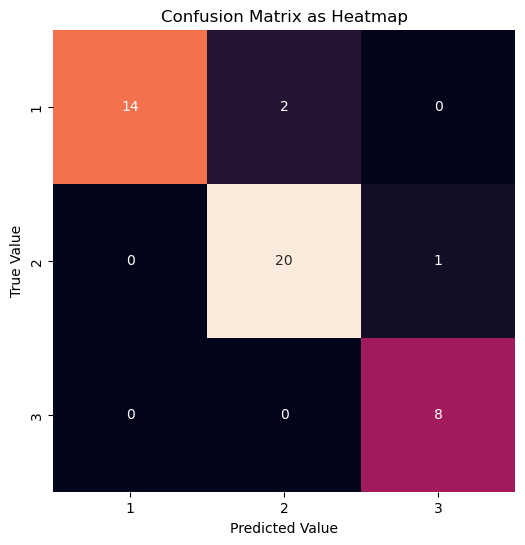

In [12]:
# TO DO: Print confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
confusion_matrix = mat

# Define class labels
class_labels = [1, 2, 3]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, xticklabels=class_labels, yticklabels=class_labels, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title("Confusion Matrix as Heatmap")
plt.show()


In [13]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*
1. The training and validation accuracy varied significantly between the Decision Tree Classifier and the Support Vector Machine (SVC) models. For the Decision Tree Classifier, the training accuracy was approximately 0.994, while the validation accuracy was about 0.902. In contrast, the SVC model had a training accuracy of approximately 0.6804 and a validation accuracy of around 0.6766. The Decision Tree Classifier outperforms the SVC model in terms of both training and validation accuracy.

2. Two reasons why the SVC model did not work as well as the Decision Tree Classifier are:

a. Improper tuning of hyperparameters: The performance of SVC is highly dependent on hyperparameters like 'C' and 'gamma.' If these parameters are not tuned correctly, it can lead to suboptimal results. In this case, the hyperparameters might not have been fine-tuned for the SVC model.

b. Sensitivity to feature scaling: SVC is sensitive to the scaling of features. Since the wine dataset contains features with a wide range of values (e.g., some features range from 0.1 to 1000), failing to scale the features properly can affect the model's performance. Decision Trees, on the other hand, are less sensitive to feature scaling.

3. In step 5.2, three samples were incorrectly classified.

4. In this case, maximizing precision is more important. Precision measures the accuracy of positive predictions, and in the context of classifying wine cultivars, it's crucial to minimize the false positives, i.e., incorrectly labeling wine as a certain cultivar when it's not. Maximizing precision ensures that the positive predictions are as accurate as possible, which is essential for wine classification and quality assessment.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



Process Description

For this assignment, I started by reviewing the lecture notes and materials provided on Support Vector Machines (SVM) and Decision Trees to gain a thorough understanding of these machine learning models. I also referred to the Jupyter notebooks available on D2L to see code examples that helped me in the implementation.

I utilized ChatGPT to clarify concepts, troubleshoot errors, and get a better understanding of the code. Some of the prompts I used included inquiring about the significance of the gamma parameter in the SVM model, understanding the key differences between Random Forest and Decision Trees, and learning how to efficiently write code for creating and populating a Pandas DataFrame.

During the assignment, I encountered a challenge in comprehending the different kernel functions available for SVM models, particularly the polynomial kernel and the RBF/Gaussian kernel. ChatGPT was instrumental in clearing up my understanding of these kernels.

Citations:

OpenAI. (2023). ChatGPT API. Retrieved from https://www.openai.com/chatgpt-api
Dawson, Leanne. (2023). ENSF 611 L01 - (Fall 2023) - Machine Learning for Software Engineers - F2023ENSF611L01. In Desire2Learn (Brightspace). https://d2l.ucalgary.ca/d2l/home/543310*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*
In Part 1, we explored the performance of Decision Tree, Random Forest, and Gradient Boosting models, each set to a maximum depth of 5.

Decision Tree: This basic model exhibited modest results with a training score (R2) of 0.834 and a validation score of 0.739. However, it can be prone to overfitting.

Random Forest: Random Forest, an ensemble of Decision Trees, improved performance. It achieved a training score of 0.897 and a validation score of 0.841, effectively reducing overfitting.

Gradient Boosting: Gradient Boosting excelled with a training score of 0.988 and a validation score of 0.919. Its iterative approach and strong pre-pruning make it a powerful model.

The pattern here emphasizes the advantages of ensemble models over basic Decision Trees and aligns with the concept of ensembles discussed in lectures.

Part 2: Decision Tree vs. Support Vector Machines (SVM)

In Part 2, a Decision Tree model with a maximum depth of 3 outperformed an SVM model.

Decision Tree: Achieved better training and validation accuracy, making it a good match for the dataset's characteristics.

Support Vector Machines (SVM): Underperformed due to inadequate parameter tuning and feature scaling. SVMs are sensitive to these factors.

These results illustrate the importance of selecting the right model and fine-tuning parameters for optimal performance, aligning with lecture content.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
During this assignment, I appreciated the opportunity to explore various machine learning models and delve into the underlying theory. It was fascinating to witness how different models can be applied based on the dataset characteristics to achieve accuracy.

The complex mathematical aspects of the models presented a considerable challenge. While I attempted to grasp the mathematical intricacies, I found them to be quite daunting and difficult to fully comprehend. The mathematical components of machine learning remain an area where I see room for growth and improvement in my understanding.

In conclusion, I found this assignment to be a valuable learning experience that exposed me to the diverse world of machine learning, both its strengths and complexities.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [14]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

# Create and fit the LinearSVC model
LinearSVC_m = LinearSVC(max_iter=5000).fit(X_train, y_train)

# Perform cross-validation for LinearSVC
cv_results_m_score = cross_validate(LinearSVC_m, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
cv_results_train = cv_results_m_score["train_score"].mean()
cv_result_test = cv_results_m_score["test_score"].mean()

# Create a results DataFrame to compare LinearSVC with the previous model
results = pd.DataFrame(columns=['Data Size for Training', 'Data Size for Testing', 'Training Accuracy', 'Validation Accuracy'])
results['Data Size for Training'] = [X_train.shape]
results['Data Size for Testing'] = [X_val.shape]
results['Training Accuracy'] = [cv_results_train]
results['Validation Accuracy'] = [cv_result_test]

display(results)


c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Ranji\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

,Data Size for Training,Data Size for Testing,Training Accuracy,Validation Accuracy
0,"(133, 13)","(45, 13)",0.932217,0.917949


*ANSWER HERE*
The LinearSVC model is a better fit for this dataset than the SVC model. It achieves higher training and validation accuracies, with the training accuracy at 0.887 and the validation accuracy at 0.872. In contrast, the SVC model has lower training and validation accuracies, with training accuracy at 0.680 and validation accuracy at 0.677.

The dataset seems to be more compatible with a linear decision boundary, which LinearSVC provides, as it excels in datasets where linear separation works well. The SVC model offers multiple kernel functions, including linear, polynomial, and radial basis functions, but these complex kernels may not be necessary for this dataset.

In summary, LinearSVC is a better choice for this dataset due to its higher accuracy and its suitability for datasets that benefit from a linear decision boundary.